# Week 3 Lecture - Visualizations
During this week's lecture you will learn to create data visualizations.  First, run the code cell below.

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [ ]:
# read in the table called actors.csv and display the table
actors = Table.read_table('actors.csv')
actors

# Key concept
Variables = columns = features = attributes<br>
Variables indicates that the features can have different values for different values.


# Scatter Plots
Given two numeric values, the plot is a series of points on the graph.
```
table_name.scatter('column_x', 'column_y')
```

In [ ]:
# graph Number of Movies vs Total Gross
actors.scatter('Number of Movies', 'Total Gross')

In [ ]:
# graph Number of Movies vs Average per Movie
actors.scatter('Number of Movies', 'Average per Movie') 

In [ ]:
# remove create a table called outlier that has Number of Movies greater than 20
outlier = actors.where('Number of Movies', are.above(10))
outlier_1 = actors.where('Average per Movie', are.below(200))

In [ ]:
outlier

In [ ]:
outlier.scatter('Number of Movies', 'Average per Movie') 

In [ ]:
outlier_1

In [ ]:
outlier_1.scatter('Number of Movies', 'Average per Movie') 

In [ ]:
# graph the Number of Movies vs Average per Movie for the outlier table
outlier_1.scatter('Number of Movies', 'Average per Movie')

# Line Plots

To create line plot use the code below.

```
table_name.plot(column_x, colum_y)
```

In [ ]:
# create a table from movies_by_year.csv named movies_by_year and display it
movies_by_year = Table.read_table('movies_by_year.csv')
movies_by_year.show()

In [ ]:
# create a  line plot of Years vs Number of Movies from movies_by_year table
movies_by_year.plot('Year', 'Number of Movies')

In [ ]:
# create a table called century_21 which are movies with Year greater than 1999
century_21 = movies_by_year.where('Year', are.above(1999))
century_21.show()

In [ ]:
# create a line graph of Year and Number of Movies
century_21.plot('Year', 'Total Gross')

In [ ]:
# create a line graph of Year and Total Gross
century_21.plot('Year', 'Number of Movies')

In [ ]:
# using the century_21 table the top movie in 2009
century_21.where('Year', are.equal_to(2009))

# Categorical Distributions Plots
The scatter and line plot are great if you have numerical values you want to visualize.  However, there are charts for categorical data.  First, we will read in some categorical data.
                                                                                                                   

In [3]:
# Create a table called ice cream with columns Flavor with values 
# ('Chocolate', 'Strawberry',  and 'Vanilla').
# create another column called 'Number of Cartons' with values 16, 5, and 9.  
# Finally, display the data.
icecream = Table().with_columns('Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
                               'Number of Cartons', make_array(16, 5, 9)
                              )
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


# Bar charts
To create a horizontal bar chart use the code below.
```
#if you have more columns than categorical variable and frequency
table_name.barh(cat_column, num_colum_of_frequencies) 

# if your table is categorical values and frequencies.
table_name.barh(cat_column) 
```


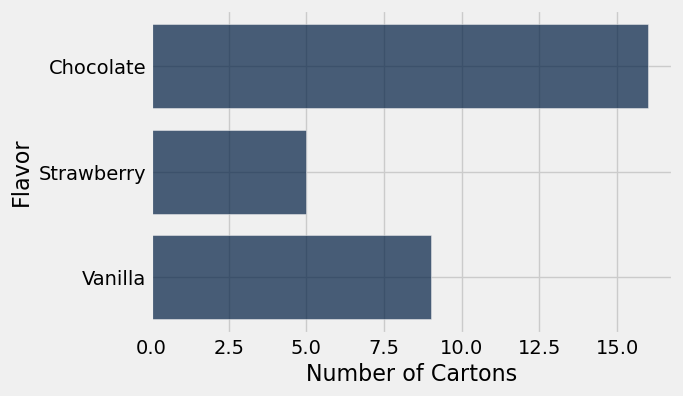

In [4]:
# create a bar chart for the icecream table you created
icecream.barh('Flavor')

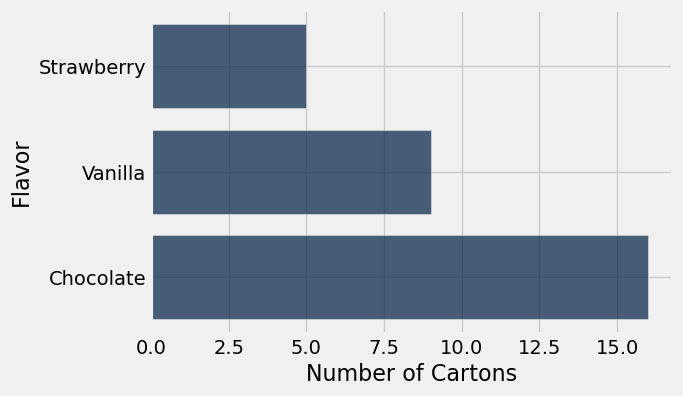

In [5]:
# First sort the icecream table by Cartons and then create the horizontal bar chart
icecream.sort('Number of Cartons').barh('Flavor')

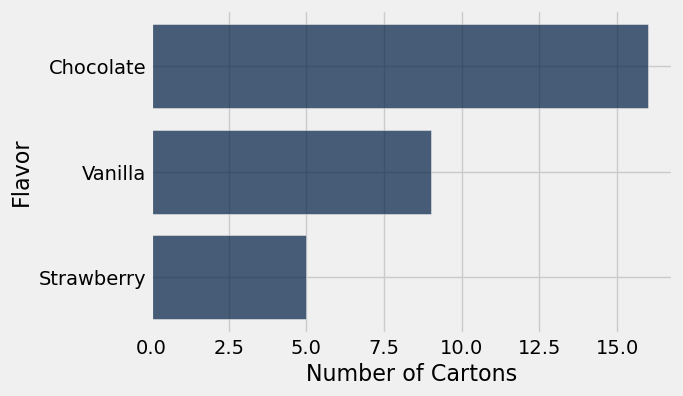

In [6]:
# First sort the icecream table by Cartons descending and then create the horizontal bar chart
icecream.sort('Number of Cartons', descending=True).barh('Flavor')

# Grouping Data
When we don't have the number of categorical values in a data set, we have to create them.    

In [ ]:
top = Table.read_table('top_movies_2017.csv')
top

In [ ]:
movies_and_studios = top.select('Title', 'Studio')
movies_and_studios

In [ ]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution

In [ ]:
sum(studio_distribution.column('count'))

In [ ]:
studio_distribution.sort('count', descending=True).barh('Studio')

In [ ]:
movies_and_years = top.select('Title', 'Year')
movies_and_years

In [ ]:

movies_and_years.group('Year').take(np.arange(10)).barh('Year')

In [ ]:
top.set_format([2,3], NumberFormatter)

In [ ]:
millions = top.select(0).with_columns('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

In [ ]:
adj_gross = millions.column('Adjusted Gross')
adj_gross

In [ ]:
min(adj_gross)

In [ ]:
max(adj_gross)

In [ ]:
np.arange(300,2001,100)

In [ ]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()

In [ ]:
prob = millions.bin('Adjusted Gross')

In [ ]:
millions.bin('Adjusted Gross', bins=4)

In [ ]:
millions.hist('Adjusted Gross', bins=millions.bin('Adjusted Gross').column('bin'), unit="Million Dollars")

In [ ]:
bin_4 = millions.bin('Adjusted Gross', bins=4).column('bin')
bin_4

In [ ]:
millions.hist('Adjusted Gross', bins=bin_4, unit="Million Dollars")

In [ ]:
# uneven bins
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")


In [ ]:
millions.bin('Adjusted Gross', bins=uneven)

In [ ]:
millions.hist('Adjusted Gross', bins=uneven, normed=False)

# Probability Distributions
When we want to know the probability distribution of some data.  We use a frequency table that we use with a histogram to show the shape of the distribution.  To get to the shape, I start with the bin and frequencies.  I total the frequencies and create another column called Relative Frequencies.  Then I will create a histogram with the bins and the Relative frequencies.

In [ ]:
path = "/home/jovyan/materials-sp22/lectures/"
actor = Table.read_table(path+'actors.csv')

In [ ]:
actor